# Import

In [2]:
from imports import *
import acquire as acq
import prepare as prep

pd.set_option("display.max_columns", None)

# Data Acquisition Code

## Clipboard

In [ ]:
# df_clipboard=pd.read_clipboard()

## Excel

In [ ]:
# df_excel=pd.read_excel('file_name.xls')

## *.csv

In [ ]:
# df_csv=pd.read_csv('file_name.csv')

## SQL

In [ ]:
# read_sql(sql_query, connection_url)

# Server Side Data Acquisition

## Google Sheet

In [ ]:
sheet_id='1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g'
sheet_name='first_sheet_by_default'
google_sheet_url=f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
df_googlesheet = pd.read_csv(google_sheet_url)
df_googlesheet.head()

In [ ]:
# for native google urls
# csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

## AWS S3

In [ ]:
df_s3 = pd.read_csv('https://s3.amazonaws.com/irs-form-990/index_2011.csv')
df_s3.head()

## SQL

In [ ]:
df = pd.read_sql('SELECT * FROM passengers',get_db_url('titanic_db'))
df.head()

# Data Caching Data In A Cache

In [ ]:
df.to_csv('titanic.csv')

## Data Caching Workflow:

In [ ]:
import os

def get_number_data():
    filename = 'numbers.csv'
    
    if os.path.exists(filename):
        print('Reading from csv file...')
        return pd.read_csv(filename)
    
    database = 'numbers'
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{database}'
    query = '''
    SELECT
        n AS original_number,
        n * 2 AS doubled
    FROM numbers
    WHERE n > 3
    '''

    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, url)
    print('Saving to csv...')
    df.to_csv(filename, index=False)
    return df

# Exercises

## 4

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris=data('iris')

print the first 3 rows

In [ ]:
df_iris.head(3)

print the number of rows and columns (shape)

In [ ]:
df_iris.shape

print the column names

In [ ]:
df_iris.columns

print the data type of each column

In [ ]:
df_iris.info()

print the summary statistics for each of the numeric variables

In [ ]:
df_iris.describe()

## 5

Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

In [ ]:
sheet_id='1ClzcgfbGk0z0zdBFp1bdKYgomtvDNHMEax4ZVZVY7zc'
sheet_name='Table1_CustDetails'
google_sheet_url=f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
df_google_sheets = pd.read_csv(google_sheet_url)
df_google_sheets = df_google_sheets.drop('Unnamed: 13', axis=1)
df_google_sheets.head()

assign the first 100 rows to a new dataframe, df_google_sheets_sample

In [ ]:
df_google_sheets_sample=df_google_sheets.head(100)
df_google_sheets_sample.shape


print the number of rows of your original dataframe

In [ ]:
df_google_sheets.shape 

print the first 5 column names

In [ ]:
x=df_google_sheets_sample.columns.to_list()
x[:5]


print the column names that have a data type of object

In [ ]:
list(df_google_sheets.select_dtypes('object'))

compute the range for each of the numeric variables

In [ ]:
y = df_google_sheets.select_dtypes('number')
y.max()-y.min()


In [ ]:
y.head()

## 6

Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [ ]:
df_excel=pd.read_excel('forest_hensley_innis_spreadsheet_exercises.xlsx')

assign the first 100 rows to a new dataframe, df_google_sheets_sample

In [ ]:
df_excel_sample=df_excel.head(100)
df_excel_sample.shape

print the number of rows of your original dataframe

In [ ]:
df_excel.shape

print the first 5 column names

In [ ]:
x=df_excel.columns.to_list()
x[:5]


print the column names that have a data type of object

In [ ]:
list(df_excel.select_dtypes('object'))

compute the range for each of the numeric variables

In [ ]:
y = df_excel.select_dtypes('number')
y.max()-y.min()


In [ ]:
y.head()

## 7

Read the data from this google sheet into a dataframe, df_google.

In [ ]:
sheet_id='1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g'
sheet_name='train'
google_sheet_url=f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [ ]:
df_google = pd.read_csv(google_sheet_url)
df_google.shape

print the first 3 rows

In [ ]:
df_google.head(3)

print the number of rows and columns

In [ ]:
df_google.shape

print the column names

In [ ]:
df_google.columns.tolist()

print the data type of each column

In [ ]:
df_google.dtypes

print the summary statistics for each of the numeric variables

In [ ]:
df_google.select_dtypes('number').describe()

print the unique values for each of your categorical variables

In [ ]:
df_google.select_dtypes('object').apply(lambda col: col.unique().tolist())


# Munging

## df.drop_duplicates


In [ ]:
# df.drop_duplicates()

## pd.get_dummies

In [ ]:
# dummy_df = pd.get_dummies(df[['cat_col_1','cat_col_2']], dummy_na=False, drop_first=[True, True])

# Train, Validate, Test Split

## sk.train_test_split

In [ ]:
# train, test = train_test_split(df, test_size=.2, stratify=df.organize_data_by_this_column)
# train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

# Impute

## 1. Create the imputer object:

In [1]:
# imputer = sk.SimpleImputer(missing_values = None, strategy='most_frequent')

# strategies: mean, median, most_frequent, constant

## 2. Fit to train:

In [ ]:
# imputer = sk.imputer.fit(train[['column_to_fit']])

## 3. Transform data:

In [ ]:
# train[['column_to_impute']] = sk.imputer.transform(train[['column_to_impute']])

# Exercises

## Iris

Use the function defined in acquire.py to load the iris data.

In [ ]:
iris=acq.get_iris_data()
iris.drop_duplicates()
iris.head()

In [ ]:
iris.isna().sum()

Drop the species_id and measurement_id columns.

In [ ]:
iris2=iris.drop(['species_id','measurement_id'],axis=1)
iris2.head()

Rename the species_name column to just species.

In [ ]:
iris3=iris2.rename({'species_name':'species'},axis=1)
iris3.head()

Create dummy variables of the species name and concatenate onto the iris dataframe.

In [ ]:
dummy_df = pd.get_dummies(iris3.species, dummy_na=False, drop_first=True)

In [ ]:
iris4 = pd.concat([iris3, dummy_df], axis=1)
iris4.head()

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(db):
	iris=acq.get_iris_data()
	iris2=iris.drop(['species_id','measurement_id'],axis=1)
	iris3=iris2.rename({'species_name':'species'},axis=1)
	dummy_df = pd.get_dummies(iris3.species, dummy_na=False, drop_first=True)
	iris4 = pd.concat([iris3, dummy_df], axis=1)
	return iris4
	

## Titanic

Use the function defined in acquire.py to load the Titanic data.

In [ ]:
titanic=acq.get_titanic_data()
titanic.drop_duplicates()
titanic.head()

In [ ]:
titanic.isna().sum()

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
((titanic.sibsp==0)&(titanic.parch==0)&(titanic.alone==0)).sum()

In [ ]:
titanic2=titanic.drop(['passenger_id','pclass','deck','embark_town','alone'],axis=1)
titanic2.head()

Encode the categorical columns.

In [ ]:
dummy_df = pd.get_dummies(titanic2[['sex','embarked','class']], dummy_na=False, drop_first=[True,True,True])

In [ ]:
titanic3 = pd.concat([titanic2, dummy_df], axis=1)
titanic3.head()

In [ ]:
titanic3.info()

In [ ]:
titanic_test=prep.prep_titanic()
titanic_test.head()

## Telco

Use the function defined in acquire.py to load the Telco data.

In [ ]:
telco=acq.get_telco_data()
telco.head()

In [ ]:
telco.info()

Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
telco.drop_duplicates(inplace=True)

In [ ]:
telco.total_charges.replace(to_replace=[' ',''],value=np.nan,inplace=True)

In [ ]:
(telco==' ').sum()

In [ ]:
telco['total_charges']=telco.total_charges.astype('float')

In [ ]:
telco.drop(['payment_type_id','contract_type_id','internet_service_type_id'],axis=1,inplace=True)

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:

dummy_list = [
	'gender',
	'partner',
	'dependents',
	'phone_service',
	'multiple_lines',
	'online_security',
	'online_backup',
	'device_protection',
	'tech_support',
	'streaming_tv',
	'streaming_movies',
	'paperless_billing',
	'churn',
	'internet_service_type',
	'contract_type',
	'payment_type'

	]


In [ ]:
list_of_trues=[True for i in dummy_list if 0<1]

In [ ]:
dummy_df = pd.get_dummies(telco[dummy_list], dummy_na=False, drop_first=True)

In [ ]:
dummy_df.info()

In [ ]:
dummy_df.head()

In [ ]:
telco=pd.concat([telco, dummy_df], axis=1)

In [ ]:
telco.info()

In [ ]:
telco.drop(dummy_list,axis=1)

# EDA - Exploratory Data Analysis

## Visual Testing

1. Univariate Stats: descriptive stats, frequencies, histograms. This is often done during prep prior to splitting into train/validate/test, but if it is not, then it should be done first here. Why? Outliers. Running tests that assume normalcy. Scale of each variable. General "getting to know" your data. - Univariate means a single variable, so we'll look at .value_counts() and histograms. - Explore the target variable itself. What is the distribution of values?
	- Explore the categorical and qualitative variables. - Explore the numeric variables.  
	<br>
1. Bivariate Stats. Bivariate means two variables.
	- Plot the interactions of each variable with the target. Document your takeaways.
		-  For numeric to numeric, use a scatterplot or lineplot
		- For numeric to categorical variables, see https://seaborn.pydata.org/tutorial/categorical.html
	- Explore interation of independent variables using viz and/or hypothesis testing to address interdependence.  
	<br>
1. Multivariate Stats (more than 2 variables): Ask additional questions of the data, such as how subgroups compare to each-other and to the overall population. Answer questions using visualizations and/or hypothesis testing.
	- If you're using seaborn's relplot or catplot, use the hue or col arguments to add extra dimension(s) to the visuals.
	- Using sns.pairplot with hue may be helpful. With too many columns, however, it can produce visuals that are too noisy to be useful.
	- See https://seaborn.pydata.org/tutorial/axis_grids.html for more multivariate options


## Statistical Testing

1. With numeric to numeric, test for correlation with Pearson's R for linear and Spearman's R for non-linear relationships.  
<br>

1. For numeric to categorical, compare the means of two populations or a subgroup to the population using a t-test, if your samples are normaly(ish) distributed but have different variances (as determined by calling .var() on each column/Series, ANOVA to compare means from more than 2 groups, or a Mann-Whitney u-test if the data does not match the assumptions of a t-test.  
<br>

1. With categorical to categorical variables, use χ<sup>2</sup>, chi-squared test.

1. For numeric to categorical, compare the means of two populations or a subgroup to the population using a t-test, if your samples are normaly(ish) distributed but have different variances (as determined by calling .var() on each column/Series, ANOVA to compare means from more than 2 groups, or a Mann-Whitney u-test if the data does not match the assumptions of a t-test.
1. With categorical to categorical variables, use χ<sup>2</sup>, chi-squared test.

## Standing Orders

1. __Document__ your initial questions or assumptions. Write them down (in your README or notebook) so they are concrete and not in your head.  
<br>

1. __Document__ your takeaways after each visualization. Even if your takeaway is, "there is nothing interesting between var1 and target".  
<br>

1. __Document__ your answer to each question.  
<br>

1. When you run statistical tests to answer your questions, __Document__ your null and alternative hypothesis, the test you run, the test results, and your conclusion.  
<br>

1. __Document__ your takeaways, in case that wasn't clear. It is a huge component of your final deliverable/analysis.  
<br>

1. __Document__ your action plan. What are your next steps and/or new questions based on what you have learned? I recommend documenting, continuing through all of your questions, and then going back and taking action only after you have answered your initial questions.  
<br>



# Exercises

## Iris

### 1 - Acquire, prepare & split your data.

In [3]:
iris=prep.prep_iris()
iris.shape

prepping iris
Using cached csv


(150, 7)

In [4]:
iris_train,iris_validate,iris_test=prep.tralidest(iris,'species')


In [5]:
iris_train.shape,iris_validate.shape,iris_test.shape

((90, 7), (34, 7), (26, 7))

In [6]:
df=iris_train
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
24,4.8,3.4,1.9,0.2,setosa,0,0
147,6.5,3.0,5.2,2.0,virginica,0,1
88,5.6,3.0,4.1,1.3,versicolor,1,0
123,6.3,2.7,4.9,1.8,virginica,0,1
31,5.4,3.4,1.5,0.4,setosa,0,0


### 2 - Univariate Stats
---
- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 24 to 131
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  90 non-null     float64
 1   sepal_width   90 non-null     float64
 2   petal_length  90 non-null     float64
 3   petal_width   90 non-null     float64
 4   species       90 non-null     object 
 5   versicolor    90 non-null     uint8  
 6   virginica     90 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.4+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,5.781111,3.023333,3.728889,1.191111,0.333333,0.333333
std,0.792081,0.434741,1.710526,0.757679,0.474045,0.474045
min,4.300000,2.000000,1.100000,0.100000,0.000000,0.000000
25%,5.100000,2.725000,1.600000,0.325000,0.000000,0.000000
50%,5.700000,3.000000,4.200000,1.300000,0.000000,0.000000
75%,6.300000,3.375000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


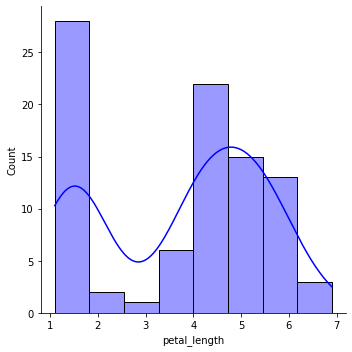

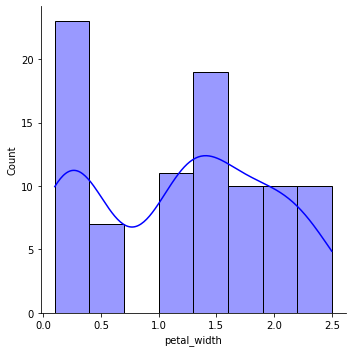

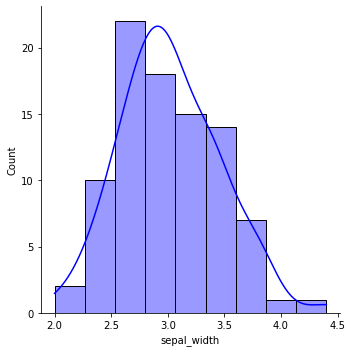

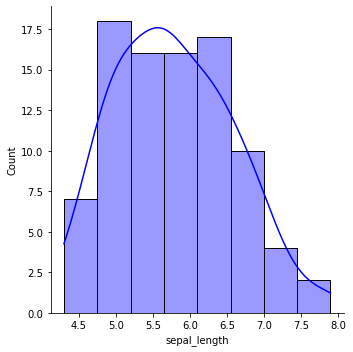

In [9]:
sns.displot(data = df, x = 'petal_length',  kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = df, x = 'petal_width', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = df, x = 'sepal_width', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = df, x = 'sepal_length', kde = True, color = 'blue', alpha = 0.4)
plt.show()


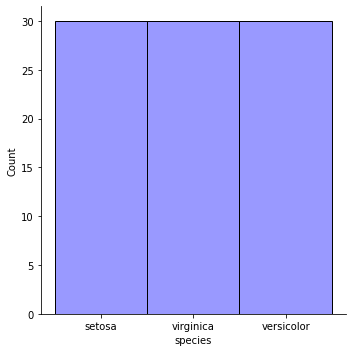

In [10]:
sns.displot(data = df, x = 'species', color = 'blue', alpha = 0.4)

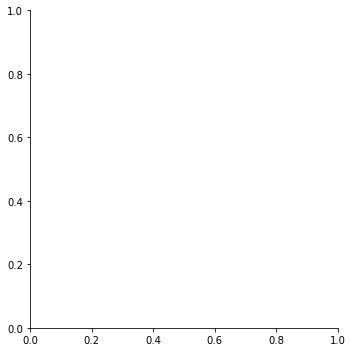

In [11]:
above=df.species.value_counts()
sns.displot()

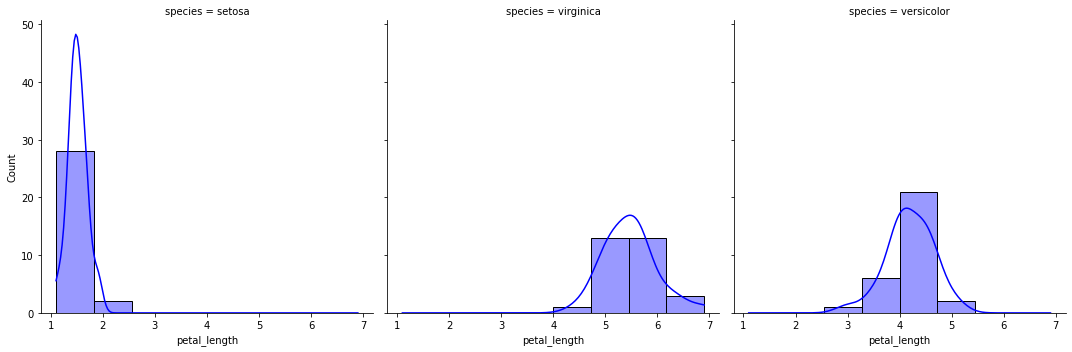

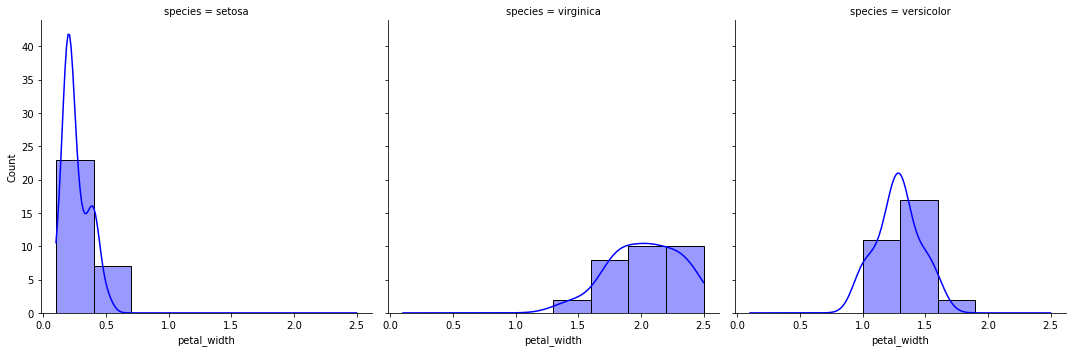

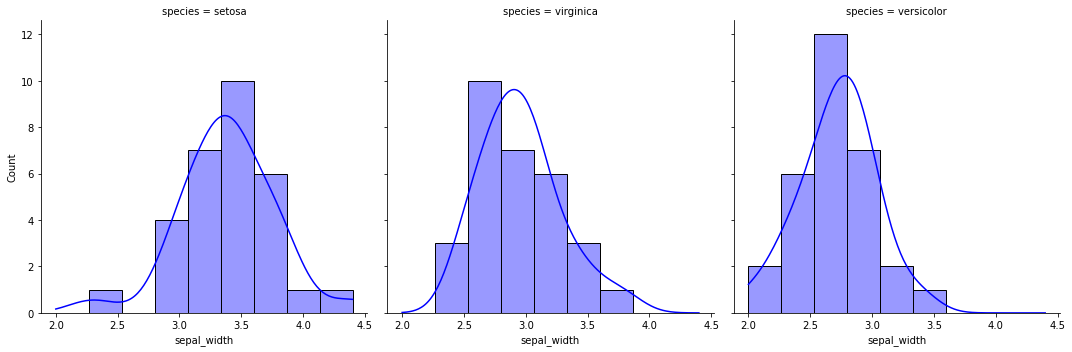

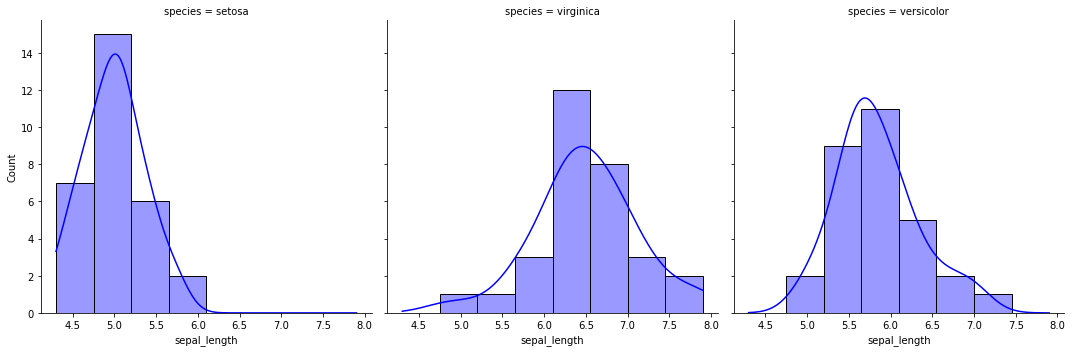

In [12]:
sns.displot(data = df, x = 'petal_length', col = 'species', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = df, x = 'petal_width', col = 'species', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = df, x = 'sepal_width', col = 'species', kde = True, color = 'blue', alpha = 0.4)
plt.show()
sns.displot(data = df, x = 'sepal_length', col = 'species', kde = True, color = 'blue', alpha = 0.4)
plt.show()


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

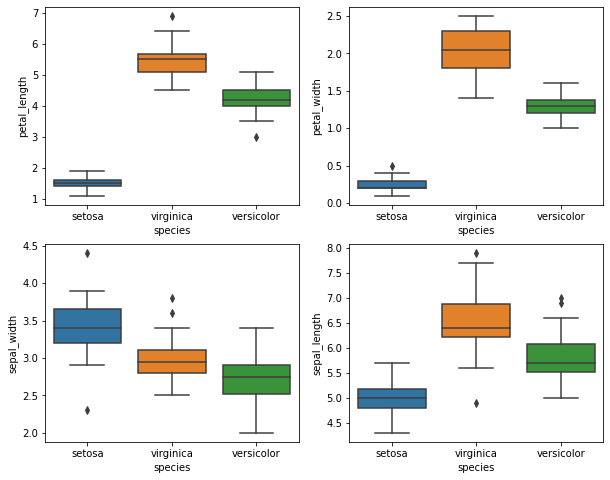

In [13]:
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.boxplot(y = 'petal_length', x = 'species', data = df, ax=ax[0,0])
sns.boxplot(y = 'petal_width', x = 'species', data = df, ax=ax[0,1])
sns.boxplot(y = 'sepal_width', x = 'species', data = df, ax=ax[1,0])
sns.boxplot(y = 'sepal_length', x = 'species', data = df, ax=ax[1,1])

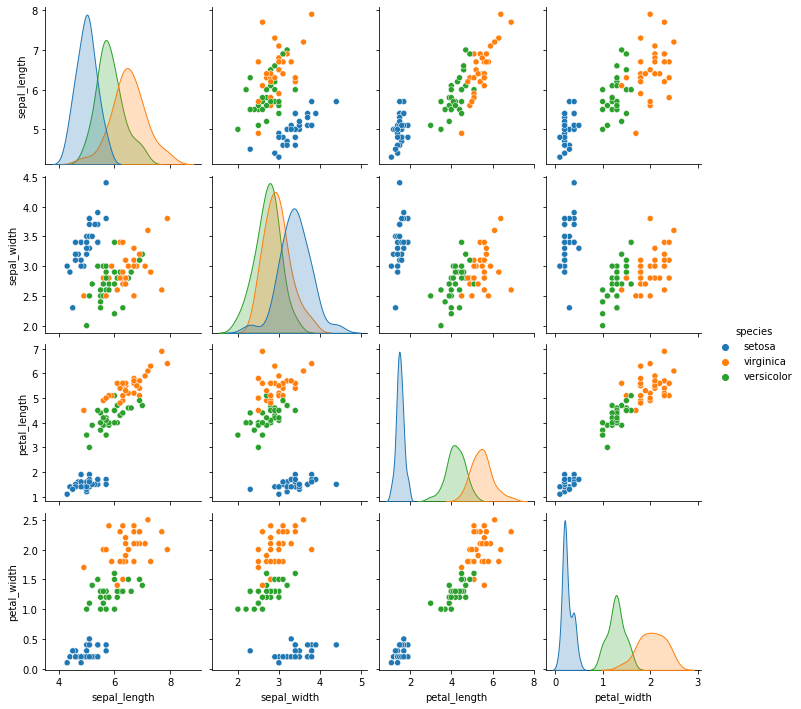

In [14]:
sns.pairplot(df,vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='species')

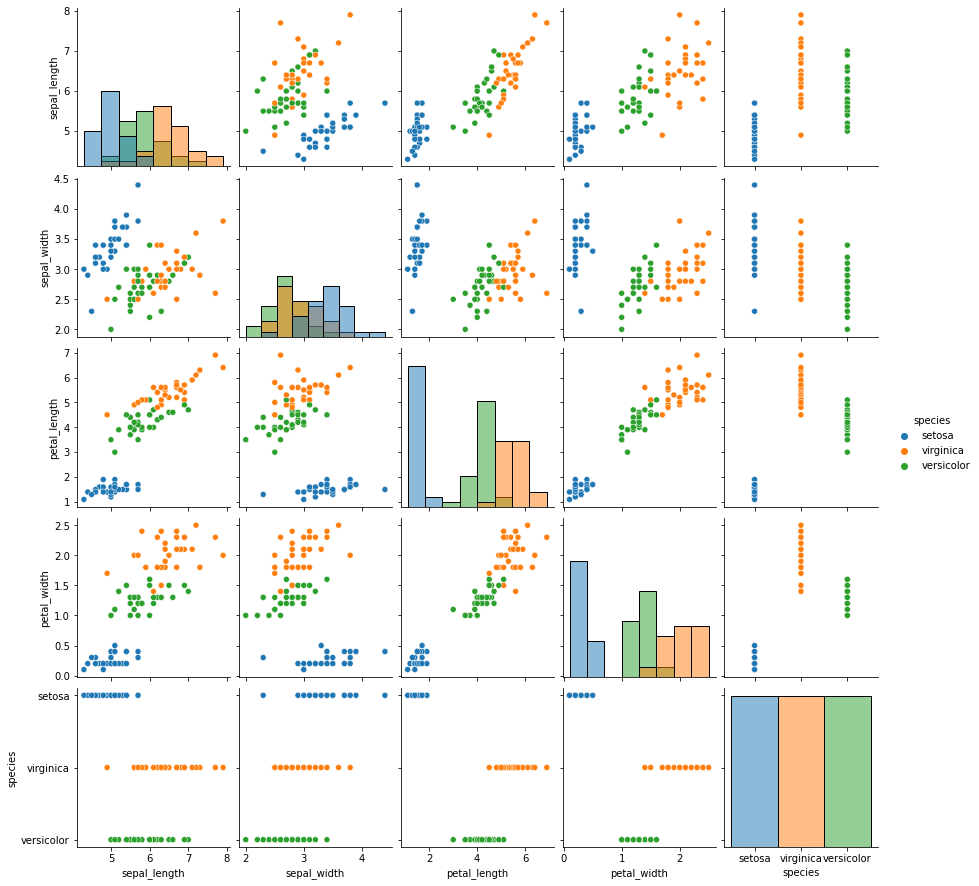

In [15]:
sns.pairplot(df,vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species'],hue='species',diag_kind = 'hist')

Document takeaways & any actions.
- petal_length and petal_width are strongly correlated
- consider these for features

### 3 - Bivariate Stats
---
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.



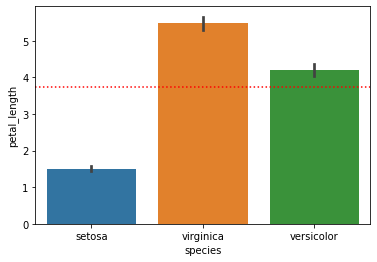

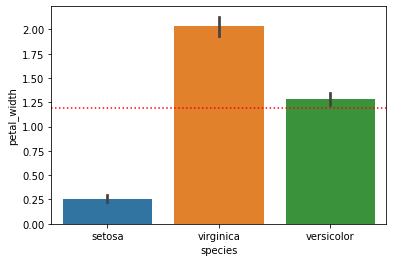

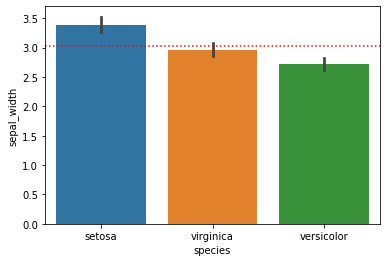

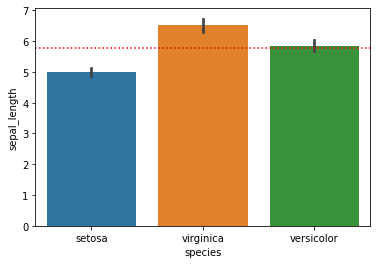

In [16]:
sns.barplot(y = 'petal_length', x = 'species', data = df)
plt.axhline(df.petal_length.mean(), label="Mean petal length", color='red', linestyle='dotted')
plt.show()
sns.barplot(y = 'petal_width', x = 'species', data = df)
plt.axhline(df.petal_width.mean(), label="Mean petal width", color='red', linestyle='dotted')
plt.show()
sns.barplot(y = 'sepal_width', x = 'species', data = df)
plt.axhline(df.sepal_width.mean(), label="Mean sepal width", color='red', linestyle='dotted')
plt.show()
sns.barplot(y = 'sepal_length', x = 'species', data = df)
plt.axhline(df.sepal_length.mean(), label="Mean sepal length", color='red', linestyle='dotted')
plt.show()

In [17]:
df.groupby('species').describe()

sepal_length                                                   \
                  count      mean       std  min    25%  50%    75%  max   
species                                                                    
setosa             30.0  4.993333  0.354219  4.3  4.800  5.0  5.175  5.7   
versicolor         30.0  5.843333  0.478996  5.0  5.525  5.7  6.075  7.0   
virginica          30.0  6.506667  0.616404  4.9  6.225  6.4  6.875  7.9   

           sepal_width                                               \
                 count  mean       std  min    25%   50%   75%  max   
species                                                               
setosa            30.0  3.39  0.384484  2.3  3.200  3.40  3.65  4.4   
versicolor        30.0  2.72  0.303315  2.0  2.525  2.75  2.90  3.4   
virginica         30.0  2.96  0.319050  2.5  2.800  2.95  3.10  3.8   

           petal_length                                                 \
                  count      mean       std  min  25%  50%    75%  max   
species                                                                  
setosa             30.0  1.510000  0.178789  1.1  1.4  1.5  1.600  1.9   
versicolor         30.0  4.196667  0.444494  3.0  4.0  4.2  4.500  5.1   
virginica          30.0  5.480000  0.508141  4.5  5.1  5.5  5.675  6.9   

           petal_width                                                  \
                 count      mean       std  min  25%   50%    75%  max   
species                                                                  
setosa            30.0  0.256667  0.100630  0.1  0.2  0.20  0.300  0.5   
versicolor        30.0  1.283333  0.170361  1.0  1.2  1.30  1.375  1.6   
virginica         30.0  2.033333  0.277095  1.4  1.8  2.05  2.300  2.5   

           versicolor                                    virginica            \
                count mean  std  min  25%  50%  75%  max     count mean  std   
species                                                                        
setosa           30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      30.0  0.0  0.0   
versicolor       30.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      30.0  0.0  0.0   
virginica        30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      30.0  1.0  0.0   

                                     
            min  25%  50%  75%  max  
species                              
setosa      0.0  0.0  0.0  0.0  0.0  
versicolor  0.0  0.0  0.0  0.0  0.0  
virginica   1.0  1.0  1.0  1.0  1.0

In [18]:
setosa=df[df.species=='setosa']
versicolor=df[df.species=='versicolor']
virginica=df[df.species=='virginica']


In [19]:
setosa.columns.tolist()

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'versicolor',
 'virginica']

$ H_0 = \textrm{"Virginica petal sizes <= Versicolor petal sizes." }$ <br>
$ H_1 = \textrm{"Virginica petal sizes > Versicolor petal sizes." }$

In [20]:
t,p=stats.mannwhitneyu(virginica.petal_width,versicolor.petal_width)
t,p

(889.0, 7.12423012584302e-11)

In [21]:
t,p=stats.mannwhitneyu(virginica.petal_length,versicolor.petal_length)
t,p

(884.0, 1.368106833576727e-10)

In [22]:
t,p=stats.mannwhitneyu(virginica.sepal_width,versicolor.sepal_width)
t,p

(627.5, 0.00844990346320156)

In [23]:
t,p=stats.mannwhitneyu(virginica.sepal_length,versicolor.sepal_length)
t,p

(738.0, 2.0617069812153646e-05)

Document takeaways & any actions.
- hard to ignore the apparent relationship between species and the size of it's petals
- petal sizes are seemingly distinctive and indicative of species
- low p-values on the Mann-Whitney test show that petals sizes are distinctive




### 4 - Multivariate Stats
---
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: `sns.relplot` with  `hue` or `col`.

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to versicolor? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



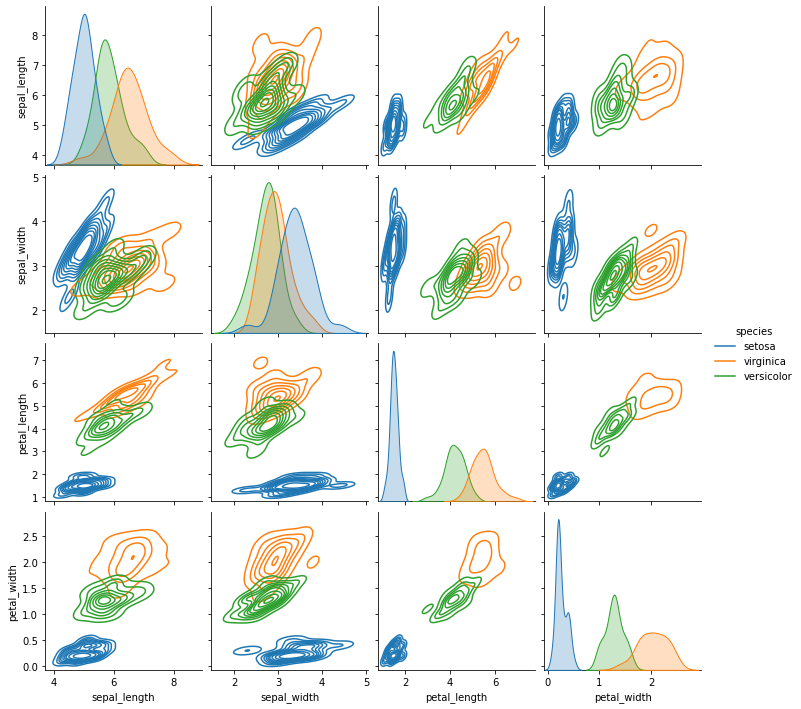

In [24]:
sns.pairplot(df,vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],hue='species',kind='kde', diag_kind = 'kde')

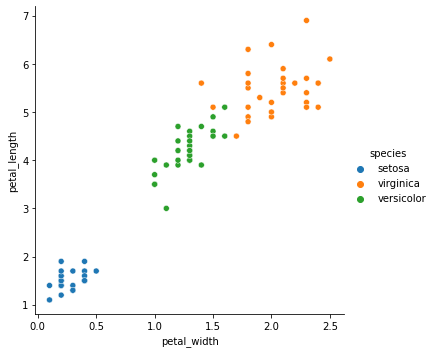

In [25]:
sns.relplot(data=df, x='petal_width', y='petal_length',hue='species')

In [26]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'versicolor', 'virginica'],
      dtype='object')

In [27]:
melted_flowers=df.melt(id_vars=['species'], value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], var_name='measurement', value_name='measure_cm')

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='measurement', ylabel='measure_cm'>

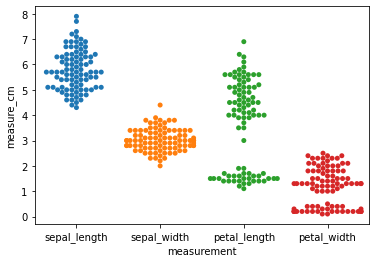

In [28]:
sns.swarmplot(data = melted_flowers, y = 'measure_cm', x = 'measurement')

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='measurement', ylabel='measure_cm'>

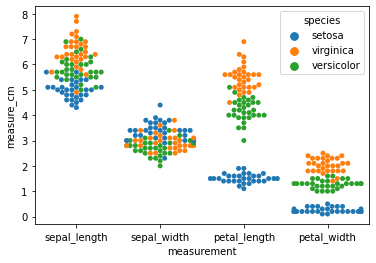

In [31]:
sns.swarmplot(data = melted_flowers, y = 'measure_cm', x = 'measurement', hue='species')

In [41]:
sepal_area = df.sepal_length*df.sepal_width
sepal_area.head()

24     16.32
147    19.50
88     16.80
123    17.01
31     18.36
dtype: float64

In [42]:
sepal_df=pd.concat([df, sepal_area], axis=1)
sepal_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,0
24,4.8,3.4,1.9,0.2,setosa,0,0,16.32
147,6.5,3.0,5.2,2.0,virginica,0,1,19.50
88,5.6,3.0,4.1,1.3,versicolor,1,0,16.80
123,6.3,2.7,4.9,1.8,virginica,0,1,17.01
31,5.4,3.4,1.5,0.4,setosa,0,0,18.36


In [46]:
sepal_df.columns

Index(['sepal_length',  'sepal_width', 'petal_length',  'petal_width',
            'species',   'versicolor',    'virginica',              0],
      dtype='object')

In [48]:
sepal_df.rename({0:'sepal_area_cm_sqr'},axis=1,inplace=True)
sepal_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,sepal_area_cm_sqr
24,4.8,3.4,1.9,0.2,setosa,0,0,16.32
147,6.5,3.0,5.2,2.0,virginica,0,1,19.50
88,5.6,3.0,4.1,1.3,versicolor,1,0,16.80
123,6.3,2.7,4.9,1.8,virginica,0,1,17.01
31,5.4,3.4,1.5,0.4,setosa,0,0,18.36


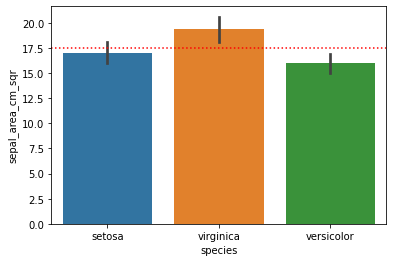

In [50]:
sns.barplot(y = 'sepal_area_cm_sqr', x = 'species', data = sepal_df)
plt.axhline(sepal_df.sepal_area_cm_sqr.mean(), label="Mean sepal area", color='red', linestyle='dotted')

In [51]:
mann_x=virginica.sepal_length*virginica.sepal_width
mann_y=versicolor.sepal_length*versicolor.sepal_width

$ H_0 = \textrm{"Virginica sepal areas <= Versicolor sepal areas." }$ <br>
$ H_1 = \textrm{"Virginica sepal areas > Versicolor sepal areas." }$

In [52]:
t,p=stats.mannwhitneyu(mann_x,mann_y)
t,p

(713.5, 0.00010074517879619615)

Document takeaways and any actions.
- low p-value on the Mann-Whitney leads us to reject null hypothesis, leading us to believe the virginica sepal areas are larger than versicolor sepal areas
- although their is a relationship, `petal_width` has a lower p-value and larger margins
